IMPORTING BASIC LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


IMPORTING DATASET

In [2]:
df=pd.read_csv("diabetes.csv")

GENERAL OVERVIEW

In [3]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(768, 9)

In [5]:
df.isna().sum(), df.duplicated().sum()

(Pregnancies                 0
 Glucose                     0
 BloodPressure               0
 SkinThickness               0
 Insulin                     0
 BMI                         0
 DiabetesPedigreeFunction    0
 Age                         0
 Outcome                     0
 dtype: int64,
 np.int64(0))

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


WE HAVE A PROBLEM

BLOODPRESSURE SKINTHICKNESS INSULIN AND BMI COLUMNS HAVE ZERO VALUES WHICH IS NOT POSSIBLE IN REALITY. SO WE NEED TO HANDLE THEM IN TRAINING PART

WE'LL HANDLE THEM IN TRAINING PART BECAUSE WE NEED TO SPLIT THE DATASET INTO TRAINING AND TEST SET FIRST AND TEST SET SHOULD NOT AFFECT THE TRAINING SET IN ANY WAY

In [7]:
cols_to_check=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [8]:
for col in cols_to_check:
    zero_count=(df[col]==0).sum()
    print(f"Number of zero values in {col}: {zero_count}")

Number of zero values in Glucose: 5
Number of zero values in BloodPressure: 35
Number of zero values in SkinThickness: 227
Number of zero values in Insulin: 374
Number of zero values in BMI: 11


UNACCEPTABLE VALUES IN THE DATASET

EDA PART

In [9]:
for col in df.columns:
    print(f"{col} : {df[col].nunique()} unique values")

Pregnancies : 17 unique values
Glucose : 136 unique values
BloodPressure : 47 unique values
SkinThickness : 51 unique values
Insulin : 186 unique values
BMI : 248 unique values
DiabetesPedigreeFunction : 517 unique values
Age : 52 unique values
Outcome : 2 unique values


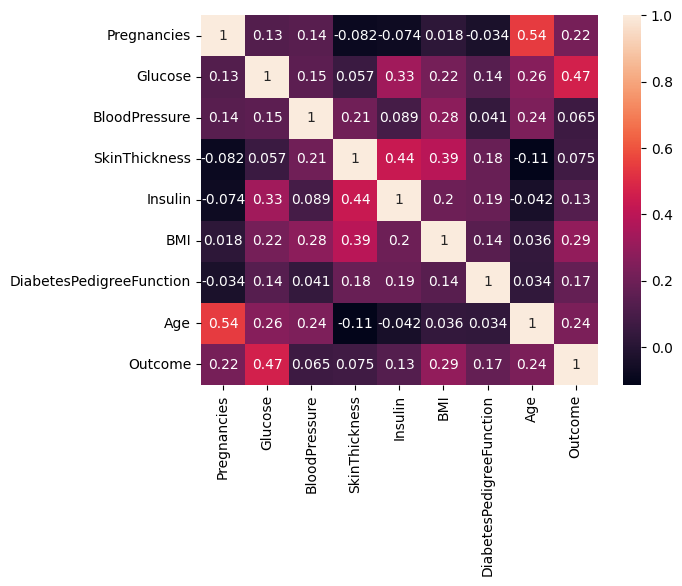

In [10]:
sns.heatmap(df.corr(), annot=True)
plt.show()

THERE IS NO TOO MUCH CORRELATED FEATURES IN THE DATASET

SO WE DO NOT DROP ANY FEATURES FOR TRAIN DATASET


In [11]:
Q3=df.quantile(0.75)
Q1=df.quantile(0.25)
IQR=Q3-Q1
outliers=((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))).sum()
outliers

Pregnancies                  4
Glucose                      5
BloodPressure               45
SkinThickness                1
Insulin                     34
BMI                         19
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64

WE HAVE TOO MUCH OUTLIERS IN THE DATASET    

LET LOOK BY GRAPHS

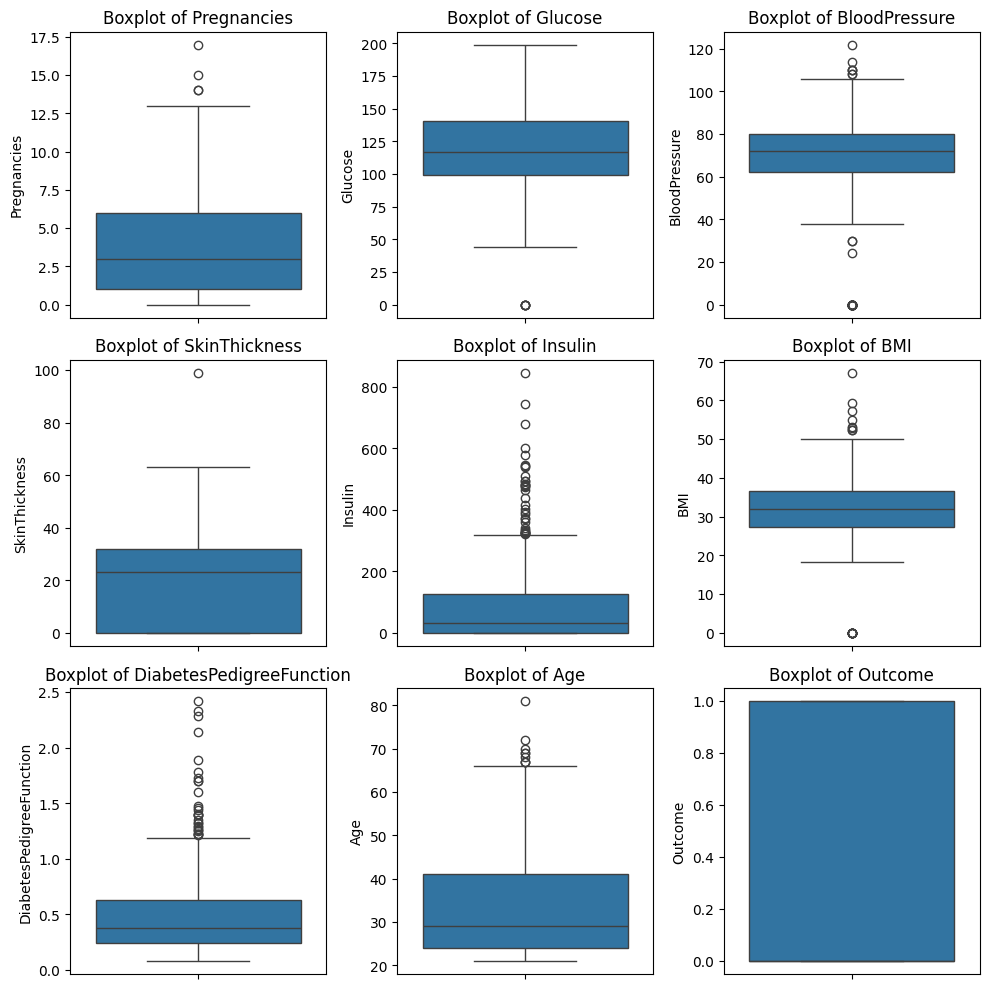

In [12]:
fig ,ax =plt.subplots(3,3, figsize=(10,10))
ax=ax.flatten()
for i,col in enumerate(df.columns):
    sns.boxplot(y=df[col], ax=ax[i])
    ax[i].set_title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

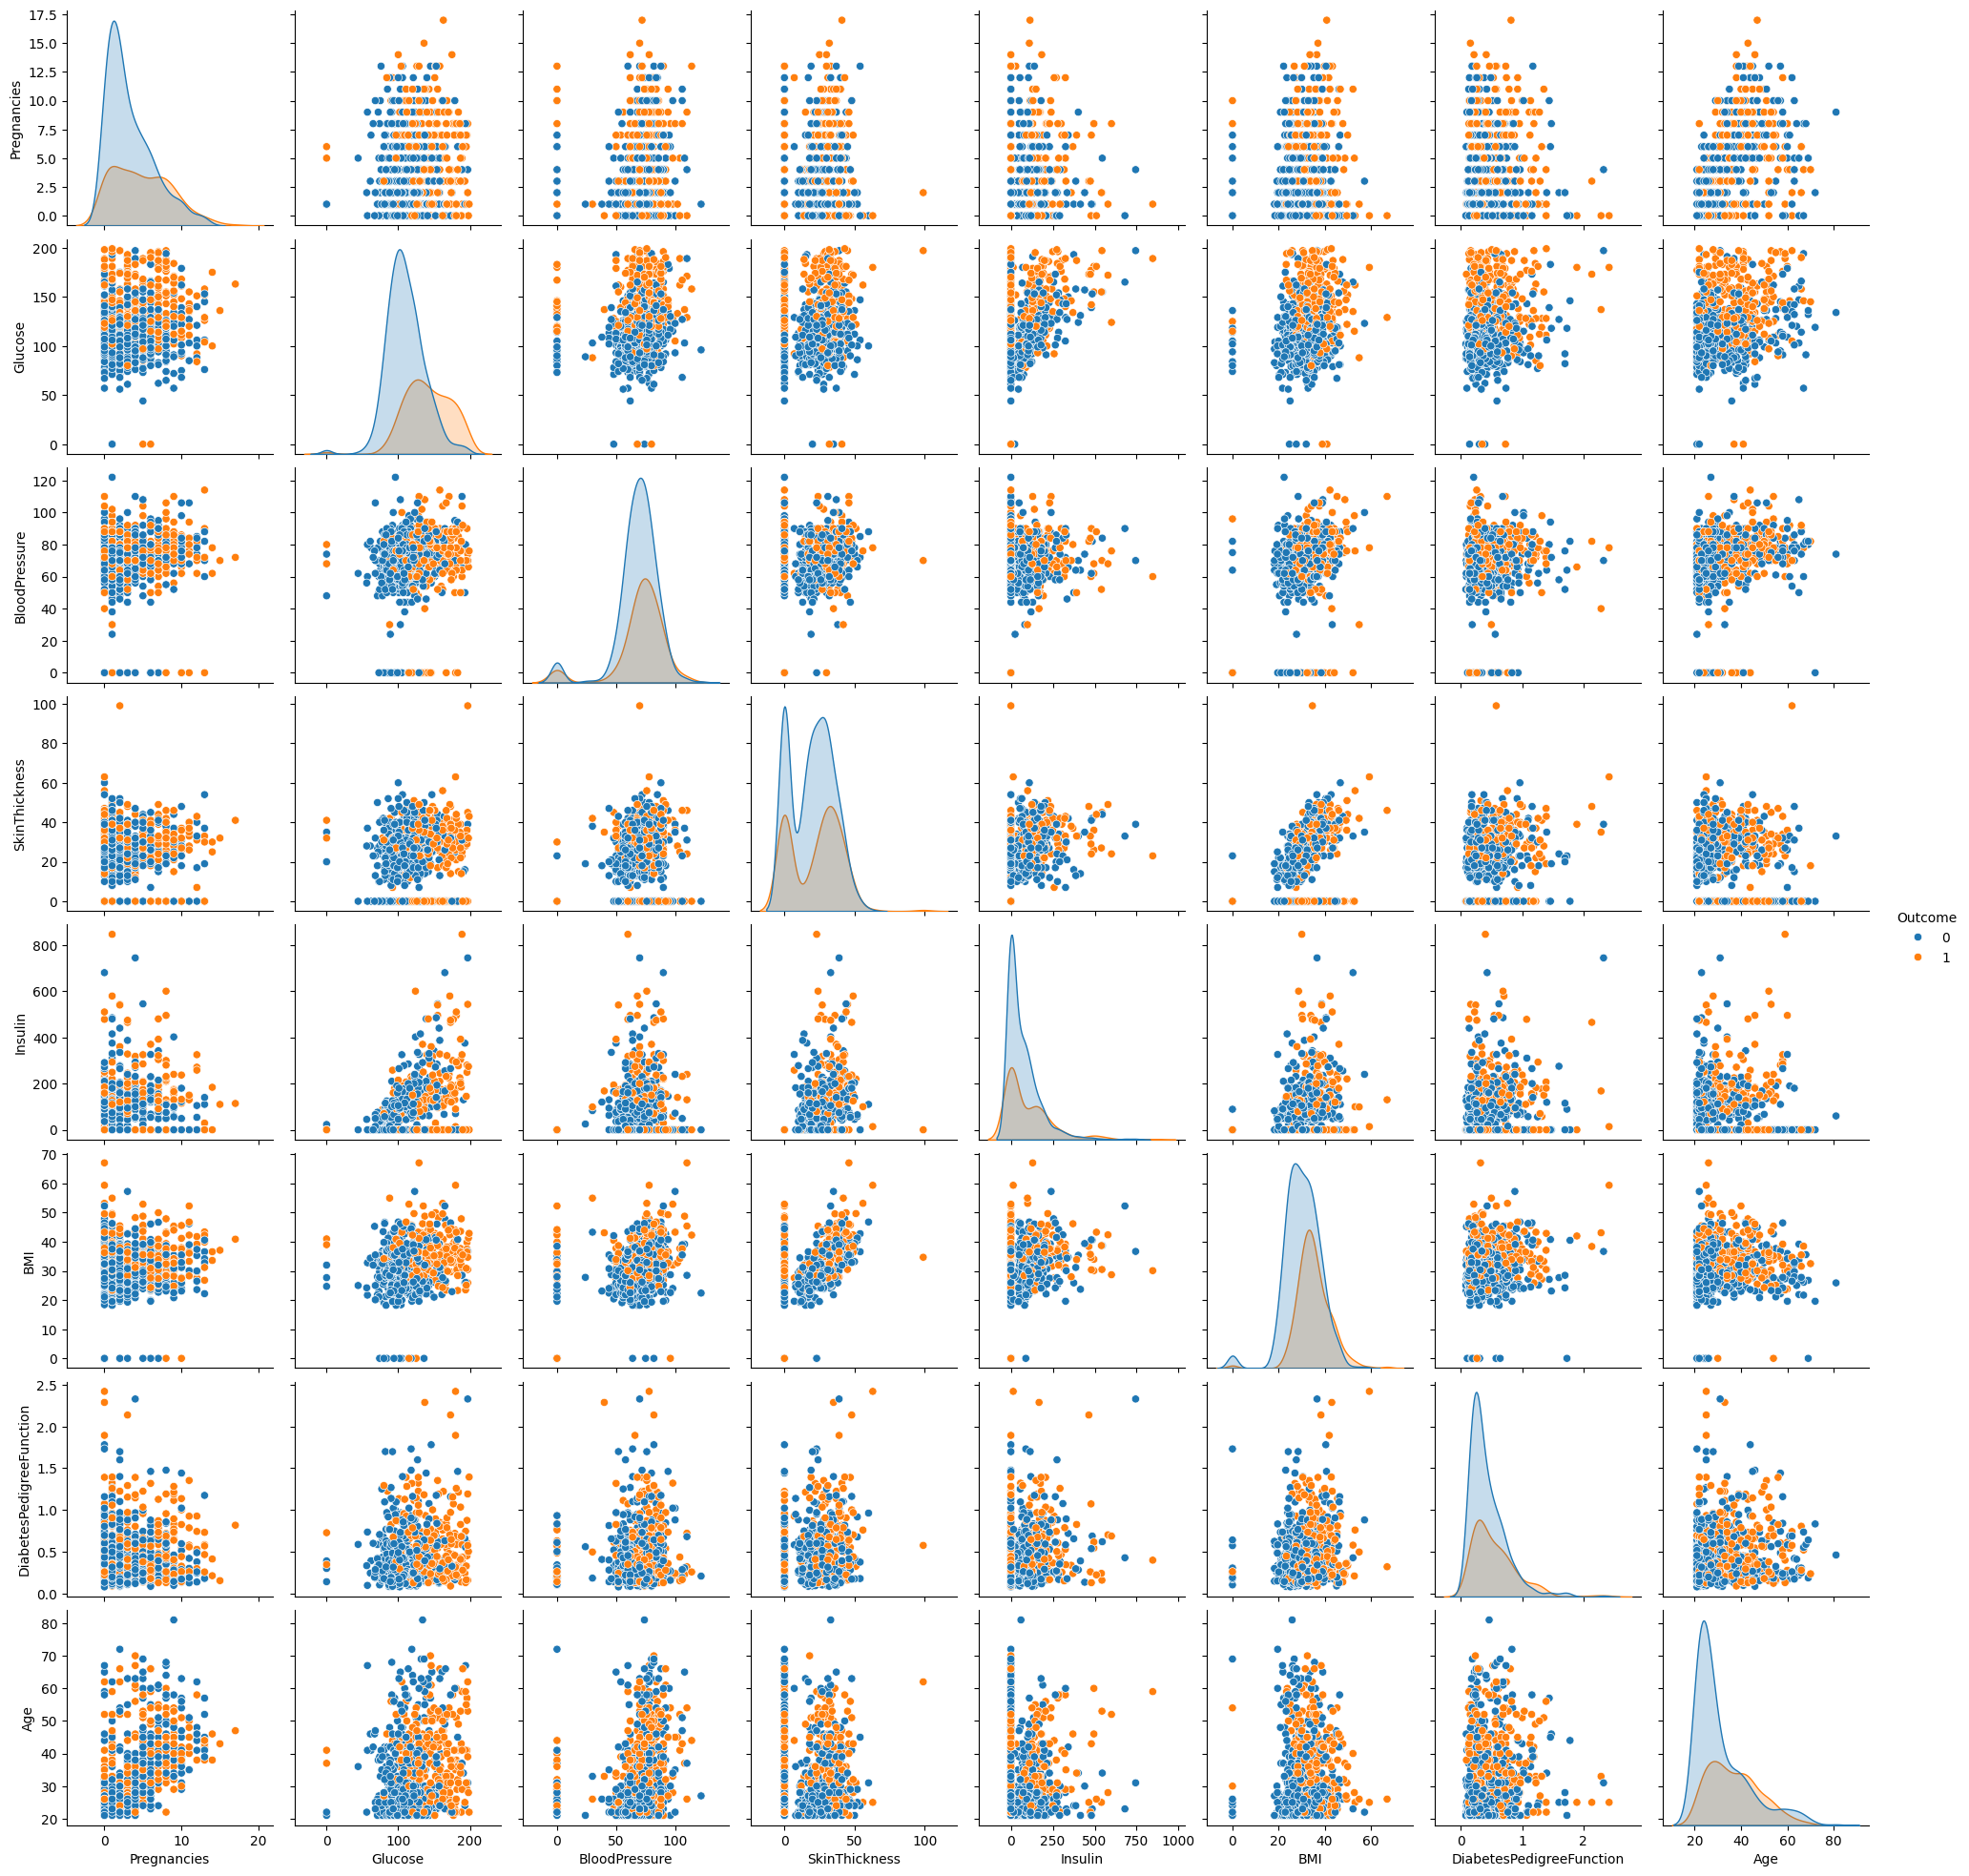

In [13]:
sns.pairplot(df,hue="Outcome")
plt.show()

LET LOOK AT THE OUTCOMES DISTRUBITION BY COLUMNS

In [14]:
for col in df.columns:
    outcomes_by_cols=df.groupby("Outcome")[col].mean()
    print(f"Average {col} by Diabetes Outcome:\n{round(outcomes_by_cols,2)}\n")
    


Average Pregnancies by Diabetes Outcome:
Outcome
0    3.30
1    4.87
Name: Pregnancies, dtype: float64

Average Glucose by Diabetes Outcome:
Outcome
0    109.98
1    141.26
Name: Glucose, dtype: float64

Average BloodPressure by Diabetes Outcome:
Outcome
0    68.18
1    70.82
Name: BloodPressure, dtype: float64

Average SkinThickness by Diabetes Outcome:
Outcome
0    19.66
1    22.16
Name: SkinThickness, dtype: float64

Average Insulin by Diabetes Outcome:
Outcome
0     68.79
1    100.34
Name: Insulin, dtype: float64

Average BMI by Diabetes Outcome:
Outcome
0    30.30
1    35.14
Name: BMI, dtype: float64

Average DiabetesPedigreeFunction by Diabetes Outcome:
Outcome
0    0.43
1    0.55
Name: DiabetesPedigreeFunction, dtype: float64

Average Age by Diabetes Outcome:
Outcome
0    31.19
1    37.07
Name: Age, dtype: float64

Average Outcome by Diabetes Outcome:
Outcome
0    0.0
1    1.0
Name: Outcome, dtype: float64



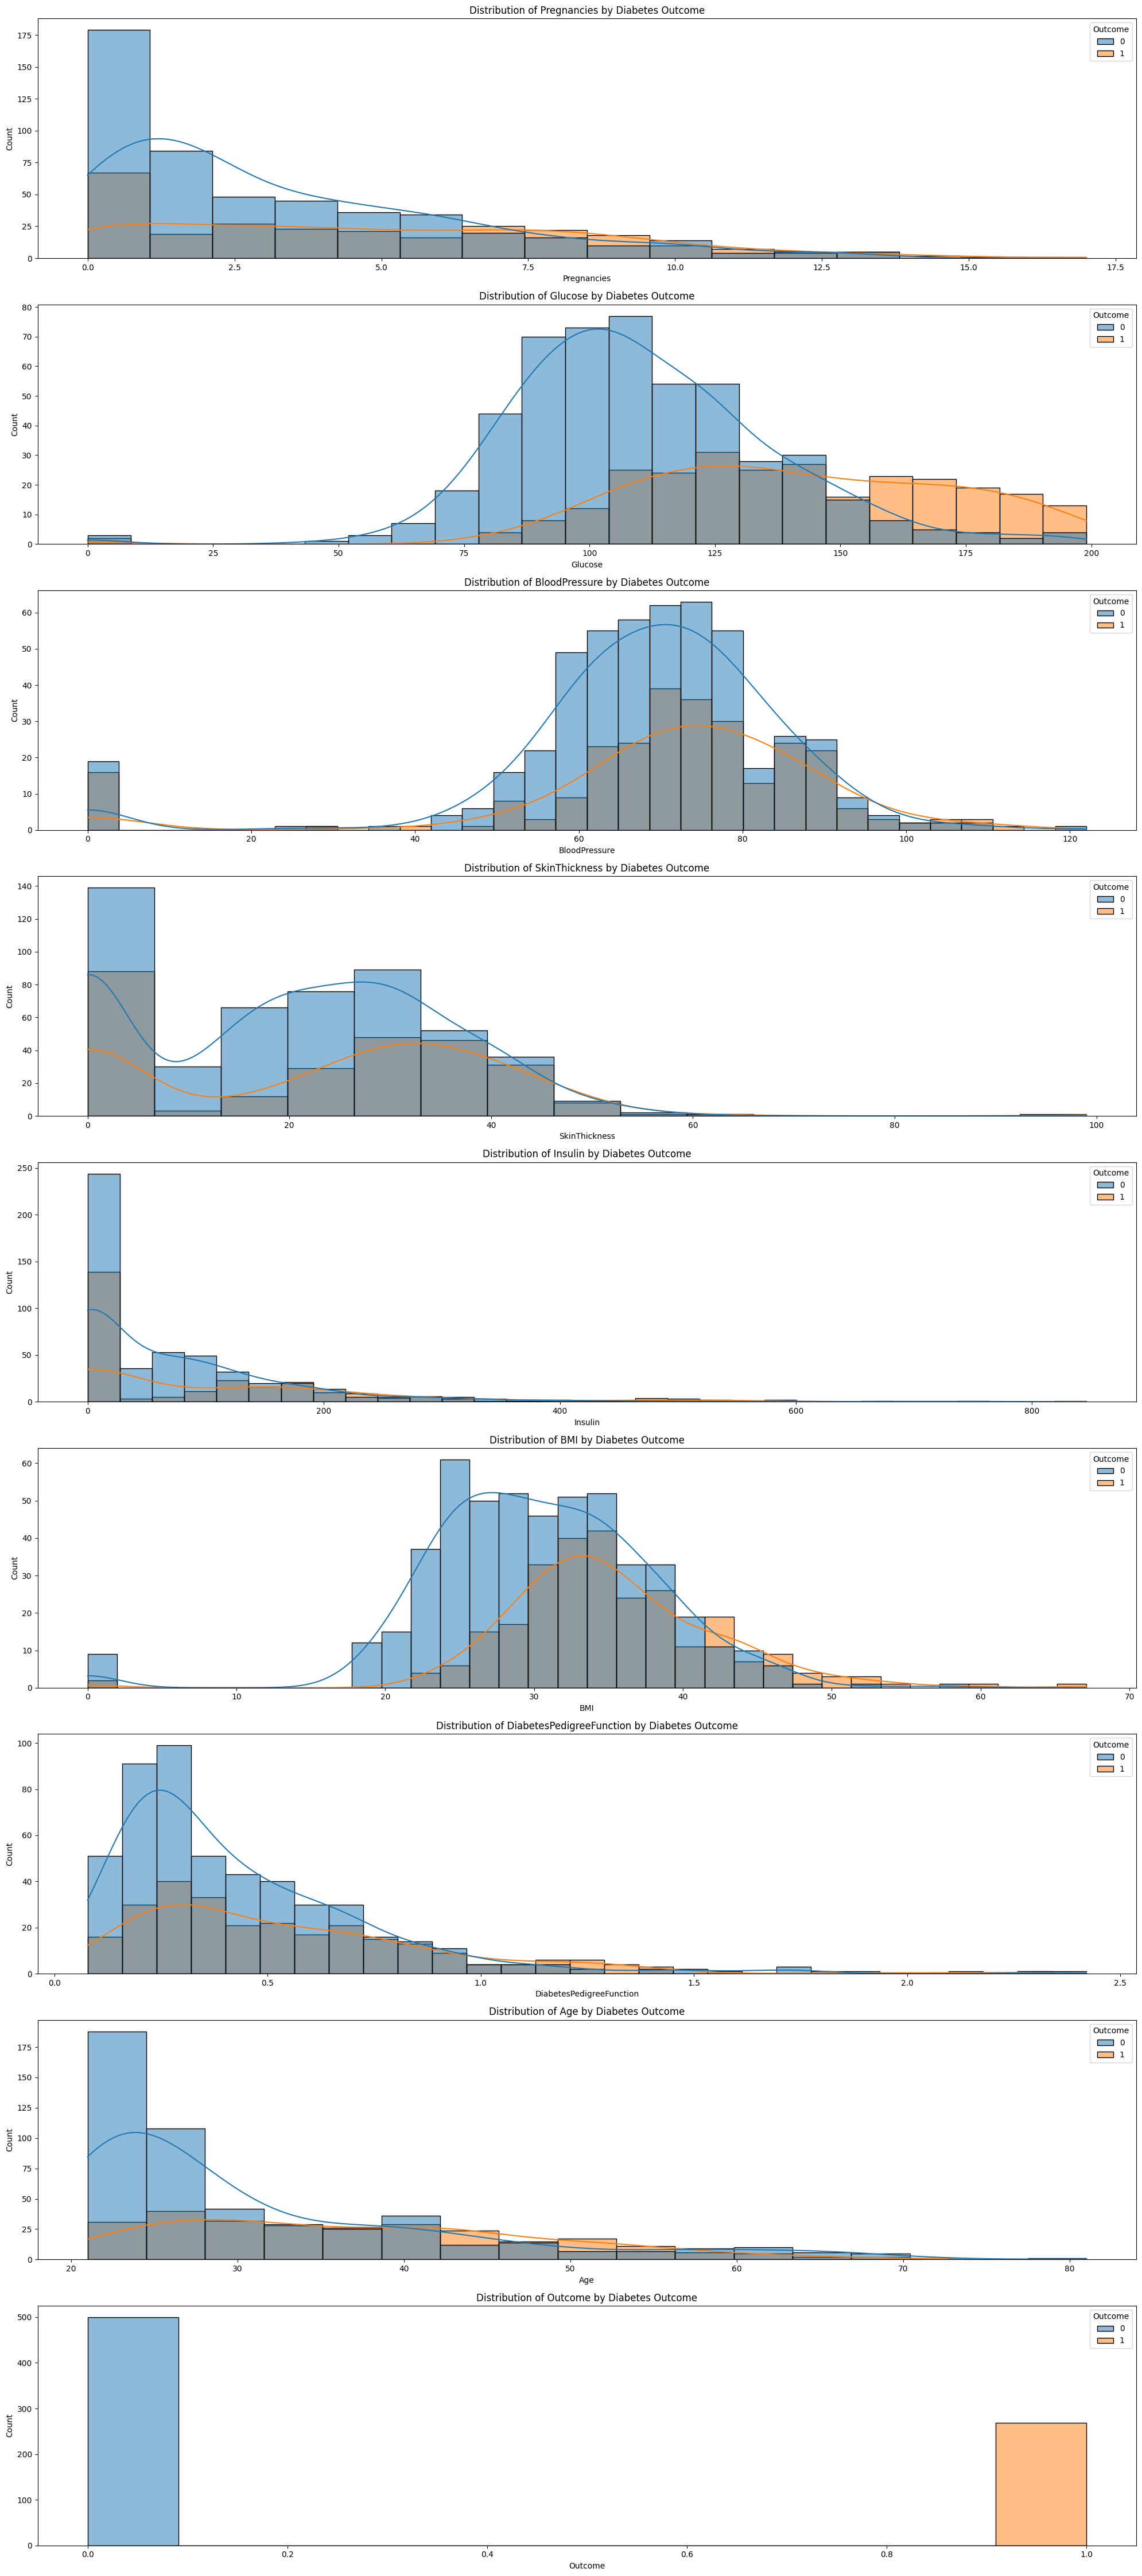

In [15]:
fig,ax=plt.subplots(len(df.columns),1, figsize=(20,len(df.columns)*5))
ax=ax.flatten()
for i,col in enumerate(df.columns):
    sns.histplot(data=df, x=col, hue="Outcome", kde=True, ax=ax[i])
    ax[i].set_title(f"Distribution of {col} by Diabetes Outcome")
plt.tight_layout()
plt.show()

TIME TO TRAIN OUR DATASET

IMPORTING LIBRARIES FOR MODELING

In [16]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV,StratifiedKFold
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve,accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 
###LOOKING FOR ALL THE DATAFRAMES WITHOUT TRUNCATION
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


LET SPLIT OUR TRAIN DATASET INTO TRAIN AND TEST SETS

In [17]:
X=df.drop("Outcome", axis=1)
y=df["Outcome"]
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=21)


HANDLING ZEROS

In [18]:
columns_to_impute=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
medians={}

for col in columns_to_impute:
    median_value=X_train[X_train[col]!=0][col].median()
    medians[col]=median_value
    X_train[col]=X_train[col].replace(0, median_value)

In [19]:
for col in columns_to_impute:
    X_test[col]=X_test[col].replace(0, medians[col])
    

WE HAVE SO MANY ZEROS SO WE NEED TO HANDLE THEM BY ROBUST SCALER

In [20]:
preprocessor=ColumnTransformer(transformers=[
    ('robust_scaler',RobustScaler(),X.columns.tolist()),
], remainder='passthrough')

X_train_scaled=preprocessor.fit_transform(X_train)
X_test_scaled=preprocessor.transform(X_test)

WE SHOULD PREPARE A FUCTION TO SHOW THE ACCURACY RESULTS AND CHECK VALIDATION

In [21]:

def check_CV(model):
    y_train_pred=model.predict(X_train_scaled)
    y_test_pred=model.predict(X_test_scaled)
    train_score=accuracy_score(y_train, y_train_pred)
    test_score=accuracy_score(y_test, y_test_pred)
    print(f"Train Accuracy: {train_score:.4f}")
    print(f"Test Accuracy: {test_score:.4f}")
    if train_score-test_score>0.35:
        print("Warning: Potential Overfitting Detected\n")
    elif (train_score and test_score)<0.48:
        print("Warning: Potential Underfitting Detected\n")
        
    else:
        print("Model seems to be well-fitted")
        print("=="*40)
        
        


SETTING A PIPELINE FOR QUICK RUN MODELS

In [22]:
def run_model(model):
    pipe=Pipeline(steps=[
        ('model', model)
    ])
    
    pipe.fit(X_train_scaled, y_train)
    y_pred=pipe.predict(X_test_scaled)
    check_CV(pipe)
    report=classification_report(y_test, y_pred,output_dict=True)
    df_report=pd.DataFrame(report).transpose()
    print("Classification Report:\n", df_report.to_string())
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("ROC_AUC Score:", roc_auc_score(y_test, y_pred))
    print("\n","/\\|"*30,"\n")
    
    

In [23]:
models={
    'RandomForestClassifier':RandomForestClassifier(),
    'LogisticRegression':LogisticRegression(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'SVC':SVC(),
    'AdaBoostClassifier':AdaBoostClassifier(),
    'GaussianNB':GaussianNB(),
    'KNeighborsClassifier':KNeighborsClassifier()   
}


LET WE LOOK WHAT WE HAVE

In [27]:
for model_name,model in models.items():
    print(f"Running model: {model_name}")
    run_model(model)
    

Running model: RandomForestClassifier
Train Accuracy: 1.0000
Test Accuracy: 0.7468
Model seems to be well-fitted
Classification Report:
               precision    recall  f1-score     support
0              0.743363  0.893617  0.811594   94.000000
1              0.756098  0.516667  0.613861   60.000000
accuracy       0.746753  0.746753  0.746753    0.746753
macro avg      0.749730  0.705142  0.712728  154.000000
weighted avg   0.748324  0.746753  0.734555  154.000000

Confusion Matrix:
 [[84 10]
 [29 31]]
Accuracy Score: 0.7467532467532467
ROC_AUC Score: 0.7051418439716312

 /\|/\|/\|/\|/\|/\|/\|/\|/\|/\|/\|/\|/\|/\|/\|/\|/\|/\|/\|/\|/\|/\|/\|/\|/\|/\|/\|/\|/\|/\| 

Running model: LogisticRegression
Train Accuracy: 0.7801
Test Accuracy: 0.7403
Model seems to be well-fitted
Classification Report:
               precision    recall  f1-score    support
0              0.736842  0.893617  0.807692   94.00000
1              0.750000  0.500000  0.600000   60.00000
accuracy       0.740260  0

WE GOT OUR SCORES BUT WE NEED TO IMPROVE THEM

In [28]:
parameters_rfc={
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2,3]
}
parameters_logistic={
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'class_weight': [None, 'balanced']
    
}
parameters_dtc={
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3]
}
parameters_ada={
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'algoritmhm': ['SAMME', 'SAMME.R'],
}
parameters_svc={
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'class_weight': [None, 'balanced']}

cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=21)

In [ ]:
for model_name, model in models.items():
    if model_name in ['RandomForestClassifier', 'LogisticRegression', 'DecisionTreeClassifier', 'AdaBoostClassifier', 'SVC']:
        print(f"Tuning hyperparameters for {model_name}")
        if model_name=='RandomForestClassifier':
            param_dist=parameters_rfc
        elif model_name=='LogisticRegression':
            param_dist=parameters_logistic
        elif model_name=='DecisionTreeClassifier':
            param_dist=parameters_dtc
        elif model_name=='AdaBoostClassifier':
            param_dist=parameters_ada
        elif model_name=='SVC':
            param_dist=parameters_svc
        
        random_search=RandomizedSearchCV(estimator=model, param_distributions=param_dist,cv=cv, scoring='accuracy', n_jobs=-1, random_state=21)
        run_model(random_search)       


Tuning hyperparameters for RandomForestClassifier
Train Accuracy: 0.9739
Test Accuracy: 0.7468
Model seems to be well-fitted
Classification Report:
               precision    recall  f1-score     support
0              0.747748  0.882979  0.809756   94.000000
1              0.744186  0.533333  0.621359   60.000000
accuracy       0.746753  0.746753  0.746753    0.746753
macro avg      0.745967  0.708156  0.715558  154.000000
weighted avg   0.746360  0.746753  0.736355  154.000000

Confusion Matrix:
 [[83 11]
 [28 32]]
Accuracy Score: 0.7467532467532467
ROC_AUC Score: 0.7081560283687943

 /\|/\|/\|/\|/\|/\|/\|/\|/\|/\|/\|/\|/\|/\|/\|/\|/\|/\|/\|/\|/\|/\|/\|/\|/\|/\|/\|/\|/\|/\| 

Tuning hyperparameters for LogisticRegression
Train Accuracy: 0.7622
Test Accuracy: 0.7468
Model seems to be well-fitted
Classification Report:
               precision    recall  f1-score     support
0              0.789474  0.797872  0.793651   94.000000
1              0.677966  0.666667  0.672269   60.000000